In [2]:
# Visualization of precision/recall tradeoff from threshold tuning

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
vals = np.arange(0.1,1.1,0.1)

In [5]:
data = 2*(vals.reshape((1,-1))*vals.reshape((-1,1)))/(vals.reshape((1,-1))+vals.reshape((-1,1)))
data_05 = (1+0.5**2)*(vals.reshape((1,-1))*vals.reshape((-1,1)))/(0.5**2*vals.reshape((1,-1))+vals.reshape((-1,1)))

In [7]:
cds = np.load("results/hfc-eval-220422/hfc_AB_w512_tuning_cds.npy")
fps = np.load("results/hfc-eval-220422/hfc_AB_w512_tuning_fps.npy")
fns = np.load("results/hfc-eval-220422/hfc_AB_w512_tuning_fns.npy")
tns = np.load("results/hfc-eval-220422/hfc_AB_w512_tuning_tns.npy")

f = 10*cds.sum(1)/(cds.sum(1)+0.5*fps.sum(1)+0.5*fns.sum(1))
p = 10*cds.sum(1)/(cds.sum(1)+fps.sum(1))
r = 10*cds.sum(1)/(cds.sum(1)+fns.sum(1))
print(f*0.1)

[0.27374788 0.28762046 0.36350455 0.46956392 0.56142632 0.63320463
 0.60298943 0.22238806]


In [5]:
oet_ps = 10*np.array([0.7857939754555597, 0.6351418616226978, 0.6178743961352657, 0.6128800574575054, 0.6121472979435677])
oet_rs = 10*np.array([0.6135307781649245, 0.7409988385598142, 0.7427409988385598, 0.743321718931475, 0.743321718931475])

print(oet_ps)

[7.85793975 6.35141862 6.17874396 6.12880057 6.12147298]


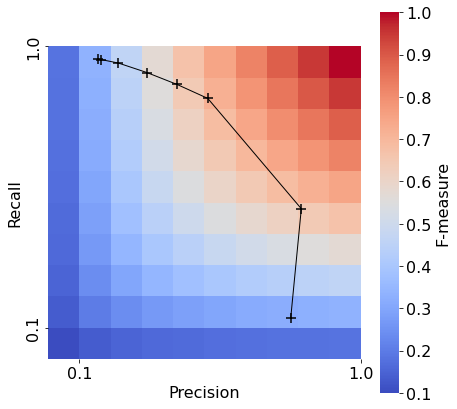

In [10]:
import matplotlib
import matplotlib.path as mpath
import matplotlib.patches as mpatches

font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data=data, cmap="coolwarm", square=True, ax=ax, cbar_kws={'label': 'F-measure'})
ax.set_xticks([1,10])
ax.set_yticks([1,10])
ax.set_xticklabels( ["0.1", "1.0"])
ax.set_yticklabels( ["0.1", "1.0"])
ax.invert_yaxis()
ax.set_ylabel("Recall")
ax.set_xlabel("Precision")

Path = mpath.Path
pp = mpatches.PathPatch(
            Path([(x, y) for x, y in zip(p,r)],
            [Path.MOVETO] + [Path.LINETO for x in p][1:]),
            edgecolor="black", facecolor='none', linewidth=1)

ax.add_patch(pp)
#pp2 = mpatches.PathPatch(
#            Path([(x, y) for x, y in zip(oet_ps,oet_rs)],
#            [Path.MOVETO] + [Path.LINETO for x in oet_ps][1:]),
#            edgecolor="black", facecolor='none', linewidth=1)

#ax.add_patch(pp2)
#for x, y in zip(p,r):
#    ax.add_patch(mpatches.Circle([x,y], radius = 0.1, color = 'r'))
ax.scatter(p,r, color="k", marker="+", s=100)
#ax.scatter(oet_ps, oet_rs, color="k", marker="x", s=50)
#ax.scatter(8.235, 9.131, color="w", marker="*", s=100)
plt.show()

print()